In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data

In [2]:
arr=pd.read_csv('../music/experiment/ArraytrackResults.txt', delimiter='\t')
arr['perSpec'] = 1
arr['smoothing'] = arr['subArrNum'] > 1
arr['backw'] = arr['backwSmth'] == 1
arr['bandwidth'] = 20
arr['decimation'] = False

cols = arr.columns.tolist()
cols = [cols[2]] + cols[3:6] + [cols[0]] + cols[-6:-3] + [cols[-3]] + cols[-2:] + cols[6:11]
arr = arr[cols]
arr['errorNextAngle'] = abs(arr.nextAngle - arr.realAngle)

In [3]:
ori=pd.read_csv('../music/experiment/OrionResults.txt', delimiter='\t')
ori['errorNextAngle'] = abs(ori.nextAngle - ori.realAngle)
ori['smoothing'] = False
ori['backw'] = False
ori['decimation'] = ori['decimation'] == 1
ori = ori.rename(columns={'packetPerSpec':'perSpec'})

cols = ori.columns.tolist()
cols = cols[1:5] + [cols[0]] + cols[-7:-5] + cols[-2:] + cols[-5:-3] + cols[5:10] + [cols[-3]]
ori = ori[cols]

In [4]:
spotfi=pd.read_csv('SpotfiClusters/SpotfiResults.txt', delimiter='\t')
spotfi=spotfi.merge(arr[['seed', 'SNR', 'realAngle', 'Kfactor']].drop_duplicates().reset_index(drop=True))
spotfi['errorAngle'] = abs(spotfi.meanA1 - spotfi.realAngle)
spotfi['errorNextAngle'] = abs(spotfi.realAngle - spotfi.meanA2)
spotfi['errorNextNextAngle'] = abs(spotfi.realAngle - spotfi.meanA3)
spotfi = spotfi.rename(columns={'packetPerSpec':'perSpec'})
spotfi.smoothing = spotfi.smoothing == 1
spotfi.backw = spotfi.backw == 1
spotfi.decimation = spotfi.decimation == 1
spotfi['estAngle'] = spotfi.meanA1
spotfi['nextAngle'] = spotfi.meanA2
spotfi['nextNextAngle'] = spotfi.meanA3

cols = spotfi.columns.tolist()
cols = [cols[1]] + [cols[-9], cols[-7], cols[-8]] + [cols[0]] + cols[4:6] + cols[2:4] + cols[6:8] + cols[-3:] + cols[-6:-3] + cols[8:-9]
spotfi = spotfi[cols]

spotfi['spectrumsNum'] = (spotfi.packetNum / spotfi.perSpec)

In [5]:
spotfi_fixed=pd.read_csv('SpotfiClusters/SpotfiResults_fixed_eigen.txt', delimiter='\t')
spotfi_fixed=spotfi_fixed.merge(arr[['seed', 'SNR', 'realAngle', 'Kfactor']].drop_duplicates().reset_index(drop=True))
spotfi_fixed['errorAngle'] = abs(spotfi_fixed.meanA1 - spotfi_fixed.realAngle)
spotfi_fixed['errorNextAngle'] = abs(spotfi_fixed.realAngle - spotfi_fixed.meanA2)
spotfi_fixed['errorNextNextAngle'] = abs(spotfi_fixed.realAngle - spotfi_fixed.meanA3)
spotfi_fixed = spotfi_fixed.rename(columns={'packetPerSpec':'perSpec'})
spotfi_fixed.smoothing = spotfi_fixed.smoothing == 1
spotfi_fixed.backw = spotfi_fixed.backw == 1
spotfi_fixed.decimation = spotfi_fixed.decimation == 1
spotfi_fixed['estAngle'] = spotfi_fixed.meanA1
spotfi_fixed['nextAngle'] = spotfi_fixed.meanA2
spotfi_fixed['nextNextAngle'] = spotfi_fixed.meanA3

cols = spotfi_fixed.columns.tolist()
cols = [cols[1]] + [cols[-9], cols[-7], cols[-8]] + [cols[0]] + cols[4:6] + cols[2:4] + cols[6:8] + cols[-3:] + cols[-6:-3] + cols[8:-9]
spotfi_fixed = spotfi_fixed[cols]

spotfi_fixed['spectrumsNum'] = (spotfi_fixed.packetNum / spotfi_fixed.perSpec)

# Look at data

In [6]:
arr.head()

,seed,SNR,Kfactor,realAngle,ant,packetNum,perSpec,smoothing,backw,bandwidth,decimation,estAngle,stdAngle,errorAngle,nextAngle,stdNextAngle,errorNextAngle
0,1,8.3404,16.5439,39.6584,8,30,1,True,True,20,False,39.6833,0.059209,0.024925,999.0,999.0,959.3416
1,1,8.3404,16.5439,39.6584,8,10,1,True,True,20,False,39.6900,0.073786,0.031591,999.0,999.0,959.3416
2,1,8.3404,16.5439,39.6584,8,30,1,True,False,20,False,39.6833,0.059209,0.024925,999.0,999.0,959.3416
3,1,8.3404,16.5439,39.6584,8,10,1,True,False,20,False,39.6900,0.073786,0.031591,999.0,999.0,959.3416
4,1,8.3404,16.5439,39.6584,8,30,1,False,True,20,False,39.7367,0.049013,0.078258,999.0,999.0,959.3416


In [81]:
ori.head()

,seed,SNR,Kfactor,realAngle,ant,packetNum,perSpec,smoothing,backw,bandwidth,decimation,estAngle,stdAngle,errorAngle,nextAngle,stdNextAngle,errorNextAngle
0,1,8.3404,16.5439,39.6584,8,10,2,False,False,40,False,39.6733,0.070373,0.014925,-54.1333,2.8215,93.7917
1,1,8.3404,16.5439,39.6584,8,10,2,False,False,40,False,39.7200,0.044721,0.061591,-55.6200,1.8116,95.2784
2,1,8.3404,16.5439,39.6584,8,10,1,False,False,40,False,39.8167,0.101990,0.158260,-15.1333,3.6398,54.7917
3,1,8.3404,16.5439,39.6584,8,10,1,False,False,40,False,39.8100,0.128670,0.151590,-0.9100,3.3044,40.5684
4,1,8.3404,16.5439,39.6584,8,10,2,False,False,40,True,39.8733,0.070373,0.214920,-51.6000,2.9367,91.2584


In [8]:
spotfi.head()

,seed,SNR,Kfactor,realAngle,ant,packetNum,perSpec,smoothing,backw,bandwidth,...,stdA4,stdD4,meanA4,meanD4,clSize5,stdA5,stdD5,meanA5,meanD5,spectrumsNum
0,1,8.3404,16.5439,39.6584,8,30,1,False,False,20,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,30.0
1,1,8.3404,16.5439,39.6584,8,30,1,False,False,20,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,30.0
2,1,8.3404,16.5439,39.6584,8,30,2,False,False,20,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,15.0
3,1,8.3404,16.5439,39.6584,8,30,2,False,False,20,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,15.0
4,1,8.3404,16.5439,39.6584,8,10,1,False,False,20,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,10.0


In [9]:
spotfi_fixed.head()

,seed,SNR,Kfactor,realAngle,ant,packetNum,perSpec,smoothing,backw,bandwidth,...,stdA4,stdD4,meanA4,meanD4,clSize5,stdA5,stdD5,meanA5,meanD5,spectrumsNum
0,1,8.3404,16.5439,39.6584,8,30,1,False,False,20,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,30.0
1,1,8.3404,16.5439,39.6584,8,30,1,False,False,20,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,30.0
2,1,8.3404,16.5439,39.6584,8,30,2,False,False,20,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,15.0
3,1,8.3404,16.5439,39.6584,8,30,2,False,False,20,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,15.0
4,1,8.3404,16.5439,39.6584,8,10,1,False,False,20,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,10.0


# Let's look at CDF of data

In [10]:
class param:
    def __init__(self, alg, ant, backw, packNum, sm=0, perSpec=1, band=20, dec=0, seed_lim=10000):
        self.alg = alg
        self.ant = ant
        self.sm = sm
        self.backw = backw
        self.packNum = packNum
        self.perSpec = perSpec
        self.band = band
        self.dec = dec
        self.seed_lim = seed_lim

In [11]:
def bool2str(x):
    if x:
        return str(1)
    else:
        return str(0)

def plotResults(paramList, angleLimits, title, xlim):
    fig, axes = plt.subplots(figsize=(14,8))

    for param in paramList:
        if param.alg == "arraytrack":
            df = arr
            label = "Arraytrack"
            label += " (ant: " + str(param.ant) + \
            "; backw: " + bool2str(param.backw) + "; packNum: " + str(param.packNum) + ")"
            param.sm = 1; param.band=20; param.dec=0; param.perSpec = 1;
        elif param.alg == "music":
            df = arr
            label = "Classical music"
            label += " (ant: " + str(param.ant) + \
            "; backw: " + bool2str(param.backw) + "; packNum: " + str(param.packNum) + ")"
            param.sm = 0; param.band=20; param.dec=0; param.perSpec = 1;
        elif param.alg == "orion":
            df = ori
            label = "Orion"
            label += " (ant: " + str(param.ant) + "; sm: " + bool2str(param.sm) + \
                "; backw: " + bool2str(param.backw) + "; packNum: " + str(param.packNum) + \
                "; perSpec: " + str(param.perSpec) + "; band: " + str(param.band) + \
                "; dec: " + bool2str(param.dec) + ")"
        elif param.alg == "spotfi":
            df = spotfi
            label = "Spotfi"
            param.perSpec = 1;
            label += " (ant: " + str(param.ant) + "; sm: " + bool2str(param.sm) + \
                "; backw: " + bool2str(param.backw) + "; packNum: " + str(param.packNum) + \
                "; band: " + str(param.band) + \
                "; dec: " + bool2str(param.dec) + ")"
        elif param.alg == "spotfi_fixed":
            df = spotfi_fixed
            label = "Spotfi (fixed eigen)"
            param.perSpec = 1;
            label += " (ant: " + str(param.ant) + "; sm: " + bool2str(param.sm) + \
                "; backw: " + bool2str(param.backw) + "; packNum: " + str(param.packNum) + \
                "; band: " + str(param.band) + \
                "; dec: " + bool2str(param.dec) + ")"
        elif param.alg == "oparray":
            df = spotfi
            label = "OpArray"
            param.perSpec = 2;
            label += " (ant: " + str(param.ant) + "; sm: " + bool2str(param.sm) + \
                "; backw: " + bool2str(param.backw) + "; packNum: " + str(param.packNum) + \
                "; band: " + str(param.band) + \
                "; dec: " + bool2str(param.dec) + ")" 
        elif param.alg == "oparray_fixed":
            df = spotfi_fixed
            label = "OpArray (fixed eigen)"
            param.perSpec = 2;
            label += " (ant: " + str(param.ant) + "; sm: " + bool2str(param.sm) + \
                "; backw: " + bool2str(param.backw) + "; packNum: " + str(param.packNum) + \
                "; band: " + str(param.band) + \
                "; dec: " + bool2str(param.dec) + ")"
            
        df = df[(abs(df.realAngle) < angleLimits[1]) & (abs(df.realAngle) > angleLimits[0]) \
                & (df.ant == param.ant) & (df.smoothing == param.sm) \
                & (df.backw == param.backw) & (df.packetNum == param.packNum) \
                & (df.perSpec == param.perSpec) & (df.bandwidth == param.band) \
                & (df.decimation == param.dec) & (df.seed < param.seed_lim)]

        sorted_df = np.sort(df.errorAngle)
        p = 1. * np.arange(len(sorted_df)) / (len(sorted_df) - 1)

        plt.plot(sorted_df, p, label=label)

    plt.legend(loc='best', fontsize=14)
    axes.set_title(title, fontdict={'fontsize':30})
    axes.set_xlabel('Angle error', size=25)
    axes.set_ylabel('p', size=25)
    axes.yaxis.set_tick_params(labelsize=15)
    axes.xaxis.set_tick_params(labelsize=15)
    axes.set_xlim([0, xlim])

# Arraytrack or Music?

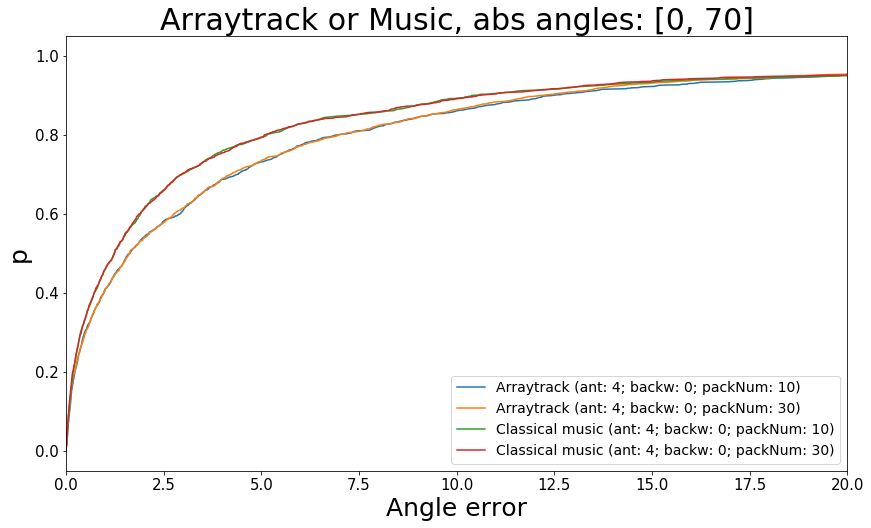

In [12]:
p1 = param(alg="arraytrack", ant=4, backw=0, packNum=10, seed_lim=2000)
p2 = param(alg="arraytrack", ant=4, backw=0, packNum=30, seed_lim=2000)
p3 = param(alg="music", ant=4, backw=0, packNum=10, seed_lim=2000)
p4 = param(alg="music", ant=4, backw=0, packNum=30, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Arraytrack or Music, abs angles: [0, 70]", 20)

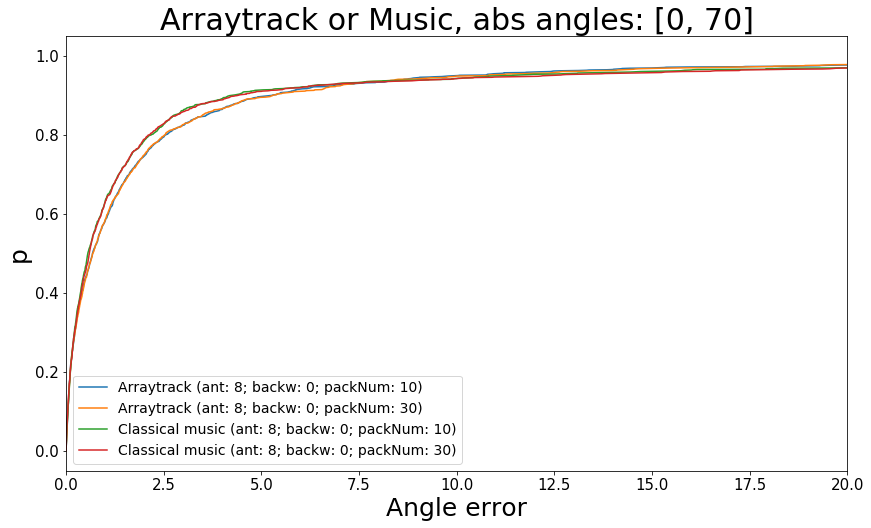

In [13]:
p1 = param(alg="arraytrack", ant=8, backw=0, packNum=10, seed_lim=2000)
p2 = param(alg="arraytrack", ant=8, backw=0, packNum=30, seed_lim=2000)
p3 = param(alg="music", ant=8, backw=0, packNum=10, seed_lim=2000)
p4 = param(alg="music", ant=8, backw=0, packNum=30, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Arraytrack or Music, abs angles: [0, 70]", 20)

1) Classical music is better than Arraytrack. It is more noticeable in the case of 4 antennas.

2) Number of packets doesn't affect estimation accuracy in case of Arraytrack and Music.

# What about backward smoothing for Arraytrack and Music?

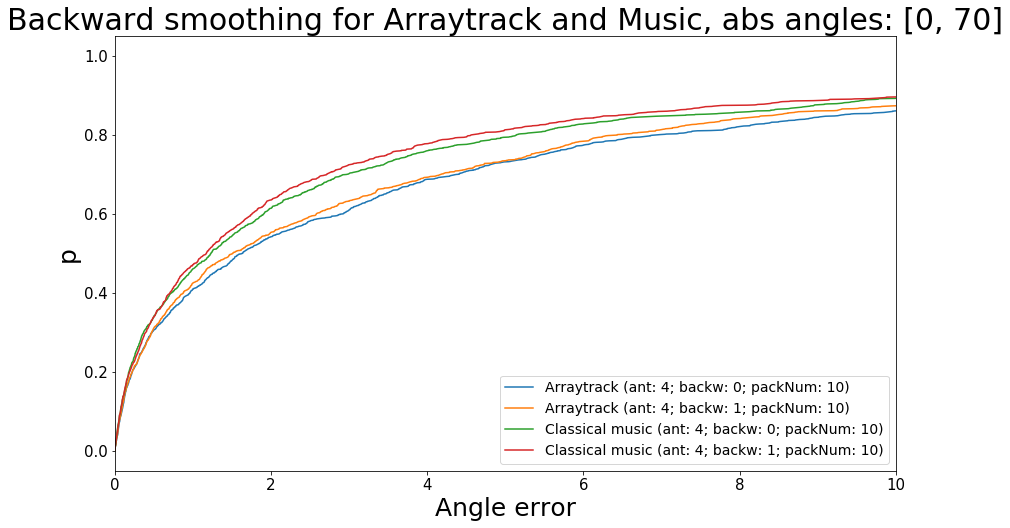

In [68]:
p1 = param(alg="arraytrack", ant=4, backw=0, packNum=10, seed_lim=2000)
p2 = param(alg="arraytrack", ant=4, backw=1, packNum=10, seed_lim=2000)
p3 = param(alg="music", ant=4, backw=0, packNum=10, seed_lim=2000)
p4 = param(alg="music", ant=4, backw=1, packNum=10, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Backward smoothing for Arraytrack and Music, abs angles: [0, 70]", 10)

1) Backward smoothing increases accuracy in case of 4 antennas.

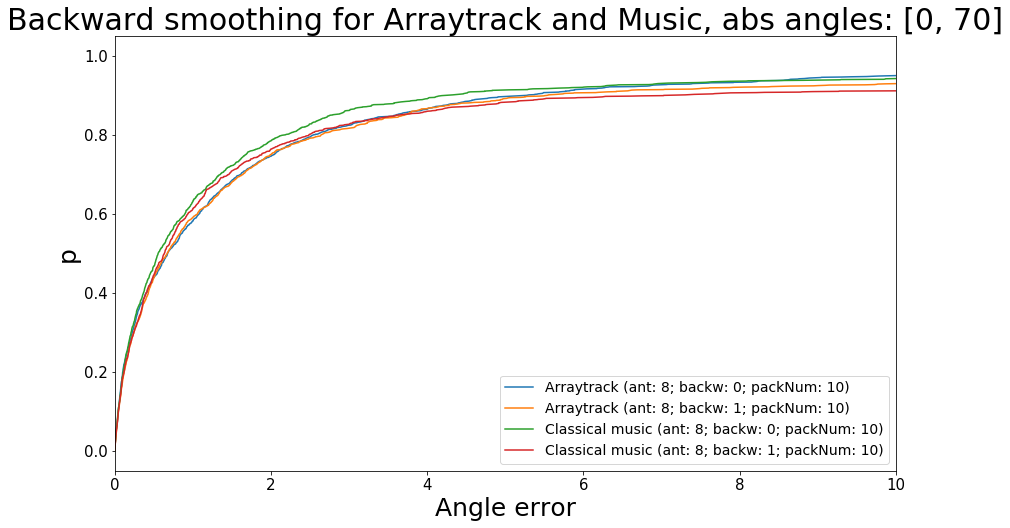

In [69]:
p1 = param(alg="arraytrack", ant=8, backw=0, packNum=10, seed_lim=2000)
p2 = param(alg="arraytrack", ant=8, backw=1, packNum=10, seed_lim=2000)
p3 = param(alg="music", ant=8, backw=0, packNum=10, seed_lim=2000)
p4 = param(alg="music", ant=8, backw=1, packNum=10, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Backward smoothing for Arraytrack and Music, abs angles: [0, 70]", 10)

1) However backward smoothing decreases accuracy in case of 8 antennas.

# Which configuration of Orion is the best?

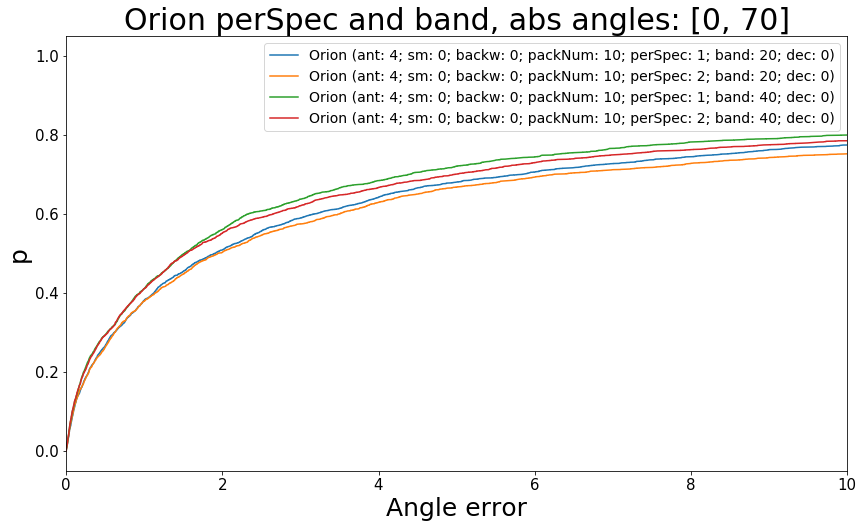

In [16]:
p1 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=0, seed_lim=2000)
p2 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=2, band=20, dec=0, seed_lim=2000)
p3 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=0, seed_lim=2000)
p4 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=2, band=40, dec=0, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Orion perSpec and band, abs angles: [0, 70]", 10)

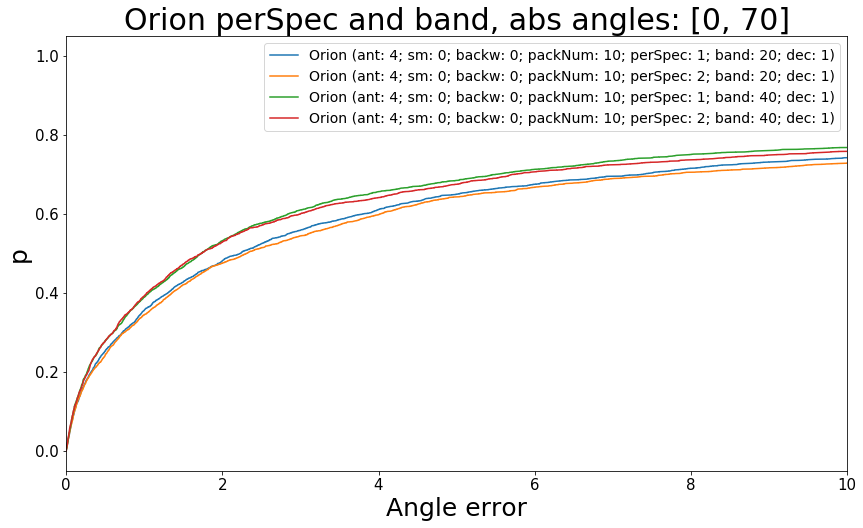

In [17]:
p1 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=1, seed_lim=2000)
p2 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=2, band=20, dec=1, seed_lim=2000)
p3 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=1, seed_lim=2000)
p4 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=2, band=40, dec=1, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Orion perSpec and band, abs angles: [0, 70]", 10)

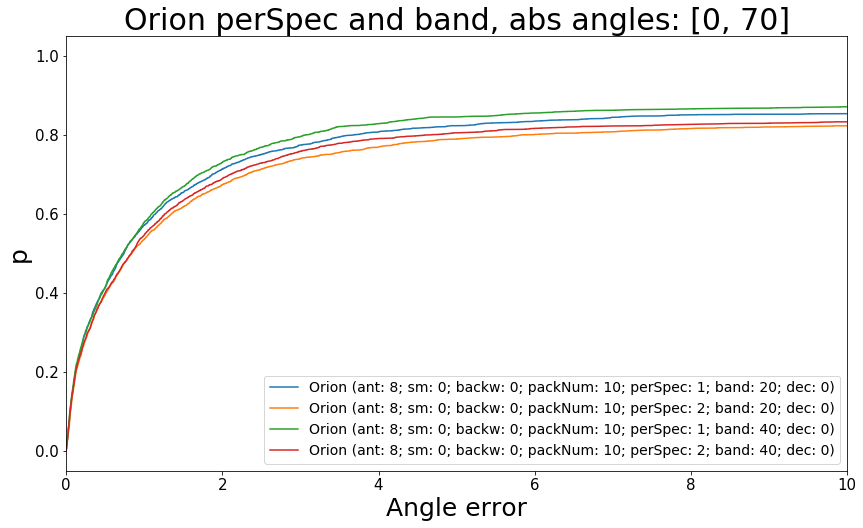

In [18]:
p1 = param(alg="orion", ant=8, sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=0, seed_lim=2000)
p2 = param(alg="orion", ant=8, sm=0, backw=0, packNum=10, perSpec=2, band=20, dec=0, seed_lim=2000)
p3 = param(alg="orion", ant=8, sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=0, seed_lim=2000)
p4 = param(alg="orion", ant=8, sm=0, backw=0, packNum=10, perSpec=2, band=40, dec=0, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Orion perSpec and band, abs angles: [0, 70]", 10)

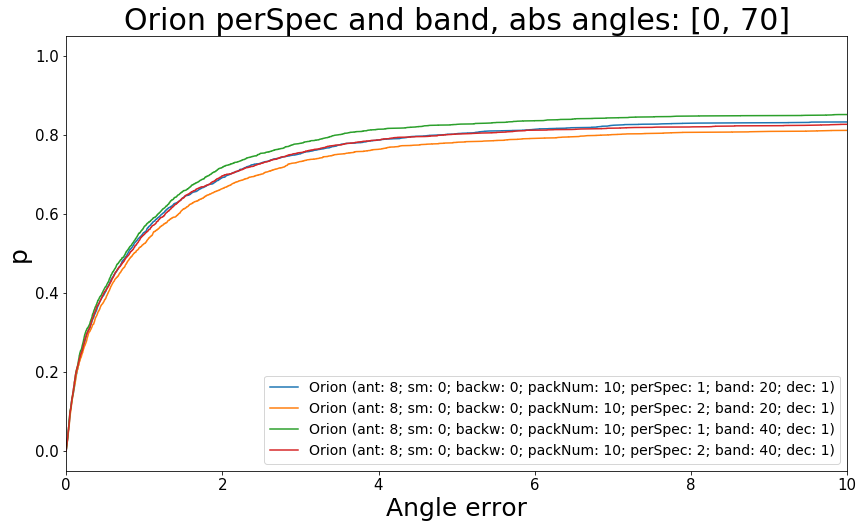

In [19]:
p1 = param(alg="orion", ant=8, sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=1, seed_lim=2000)
p2 = param(alg="orion", ant=8, sm=0, backw=0, packNum=10, perSpec=2, band=20, dec=1, seed_lim=2000)
p3 = param(alg="orion", ant=8, sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=1, seed_lim=2000)
p4 = param(alg="orion", ant=8, sm=0, backw=0, packNum=10, perSpec=2, band=40, dec=1, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Orion perSpec and band, abs angles: [0, 70]", 10)

1) Multiple packets per spectrum decrease accuracy

2) Wider bandwidth increases accuracy

# What about subcarrier decimation in case of Orion?

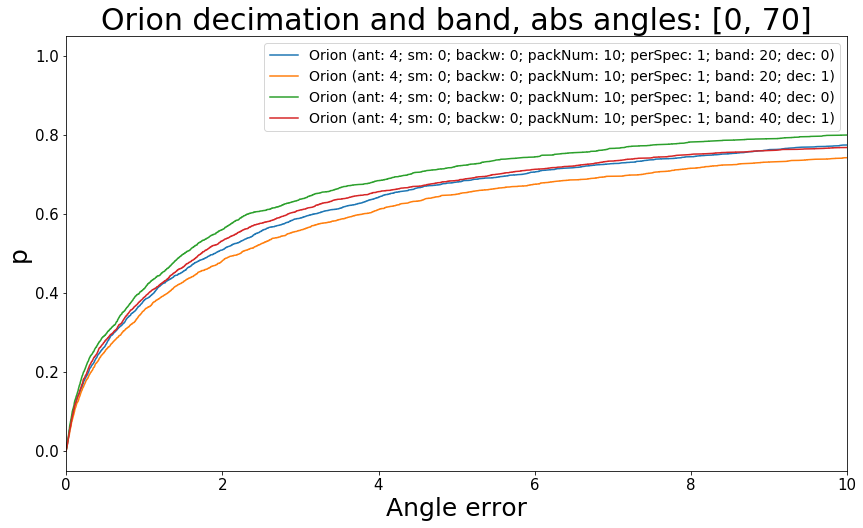

In [20]:
p1 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=0, seed_lim=2000)
p2 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=1, seed_lim=2000)
p3 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=0, seed_lim=2000)
p4 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=1, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Orion decimation and band, abs angles: [0, 70]", 10)

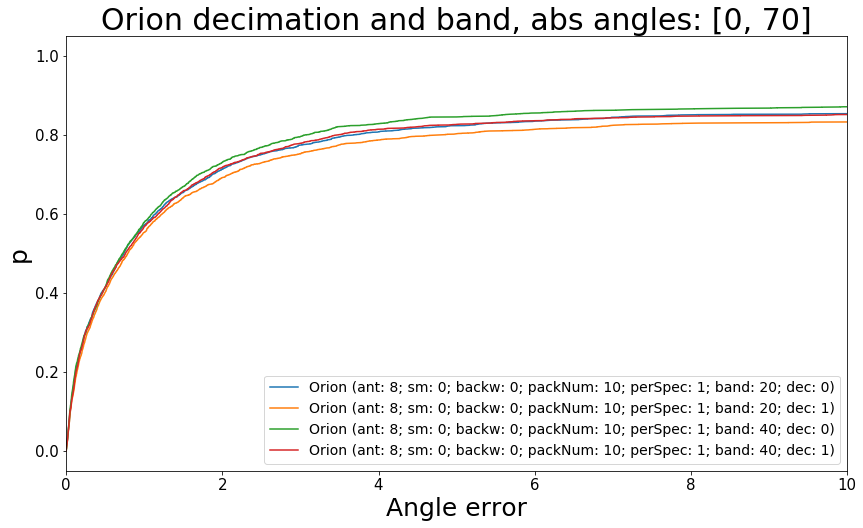

In [70]:
p1 = param(alg="orion", ant=8, sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=0, seed_lim=2000)
p2 = param(alg="orion", ant=8, sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=1, seed_lim=2000)
p3 = param(alg="orion", ant=8, sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=0, seed_lim=2000)
p4 = param(alg="orion", ant=8, sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=1, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Orion decimation and band, abs angles: [0, 70]", 10)

1) More subcarriers - better accuracy.

# Which way of choosing eigen values in Spotfi is better?

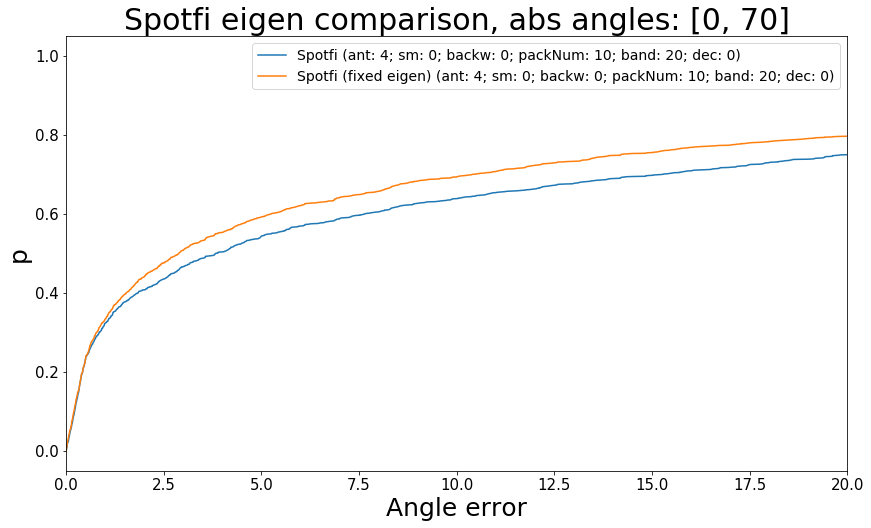

In [22]:
p1 = param(alg="spotfi", ant=4, sm=0, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=4, sm=0, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi eigen comparison, abs angles: [0, 70]", 20)

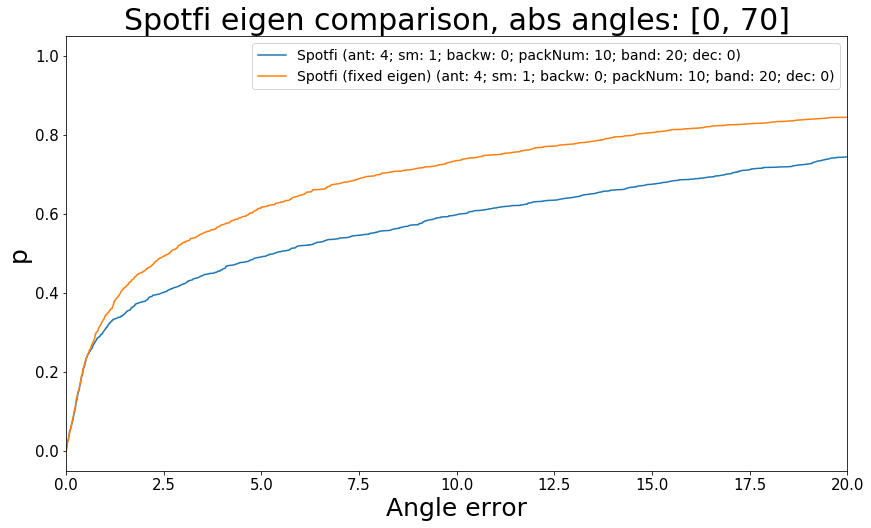

In [23]:
p1 = param(alg="spotfi", ant=4, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=4, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi eigen comparison, abs angles: [0, 70]", 20)

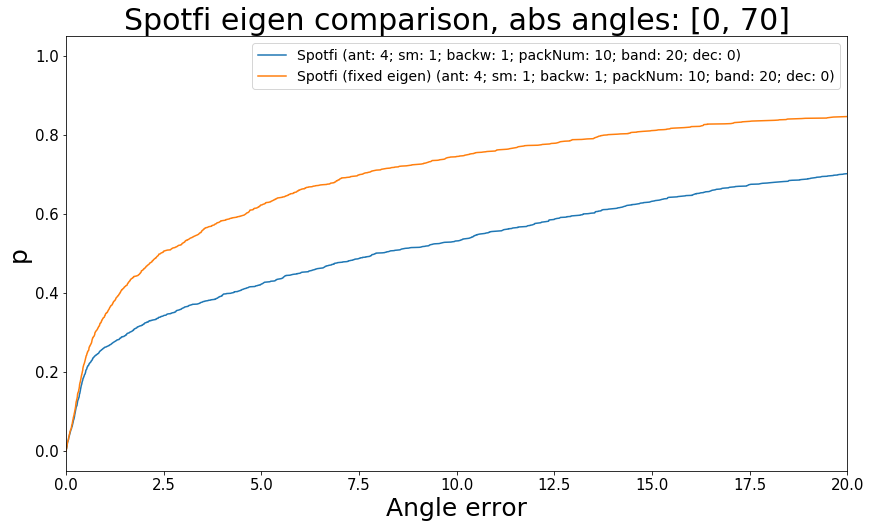

In [24]:
p1 = param(alg="spotfi", ant=4, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=4, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi eigen comparison, abs angles: [0, 70]", 20)

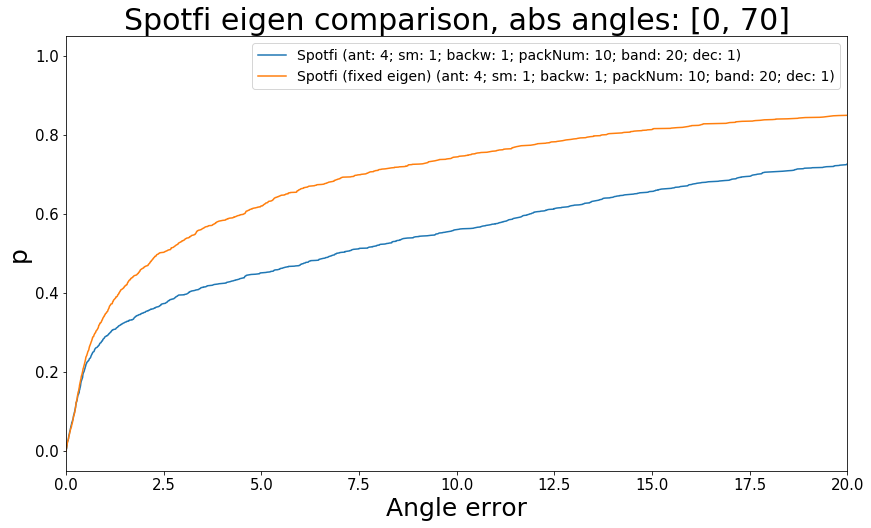

In [25]:
p1 = param(alg="spotfi", ant=4, sm=1, backw=1, packNum=10, band=20, dec=1, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=4, sm=1, backw=1, packNum=10, band=20, dec=1, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi eigen comparison, abs angles: [0, 70]", 20)

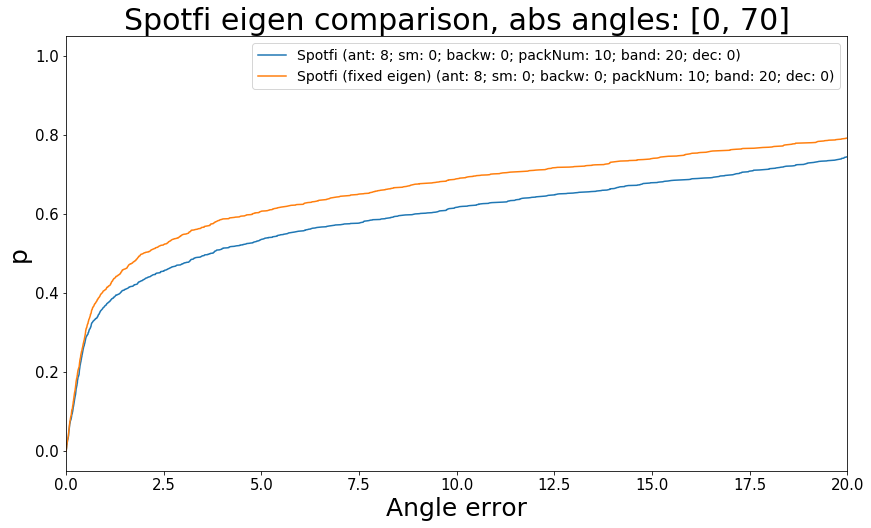

In [26]:
p1 = param(alg="spotfi", ant=8, sm=0, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=8, sm=0, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi eigen comparison, abs angles: [0, 70]", 20)

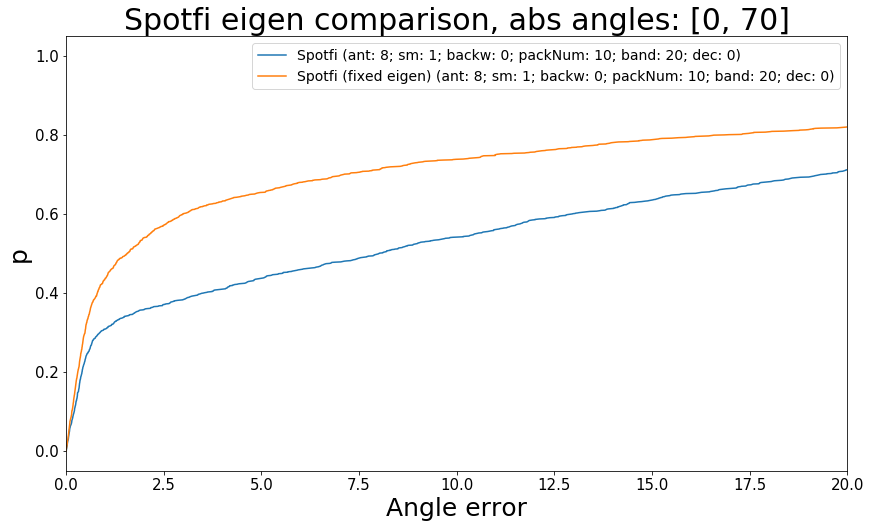

In [27]:
p1 = param(alg="spotfi", ant=8, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=8, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi eigen comparison, abs angles: [0, 70]", 20)

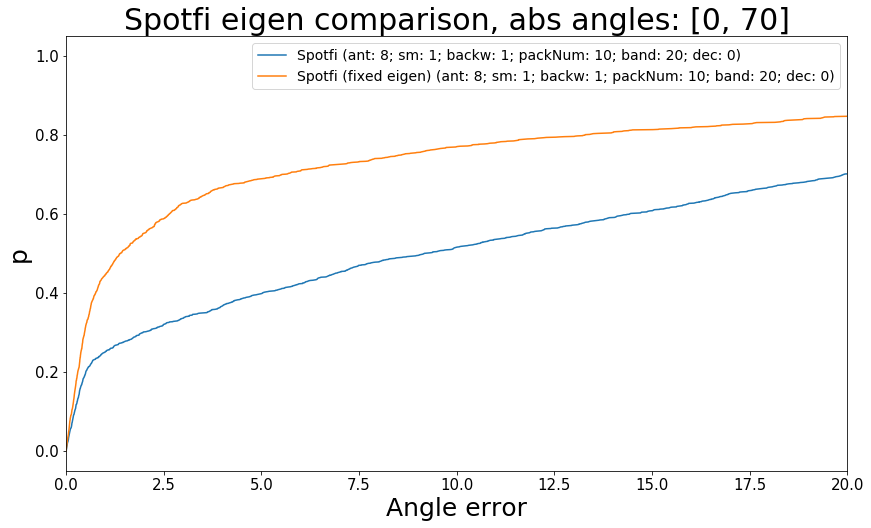

In [28]:
p1 = param(alg="spotfi", ant=8, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=8, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi eigen comparison, abs angles: [0, 70]", 20)

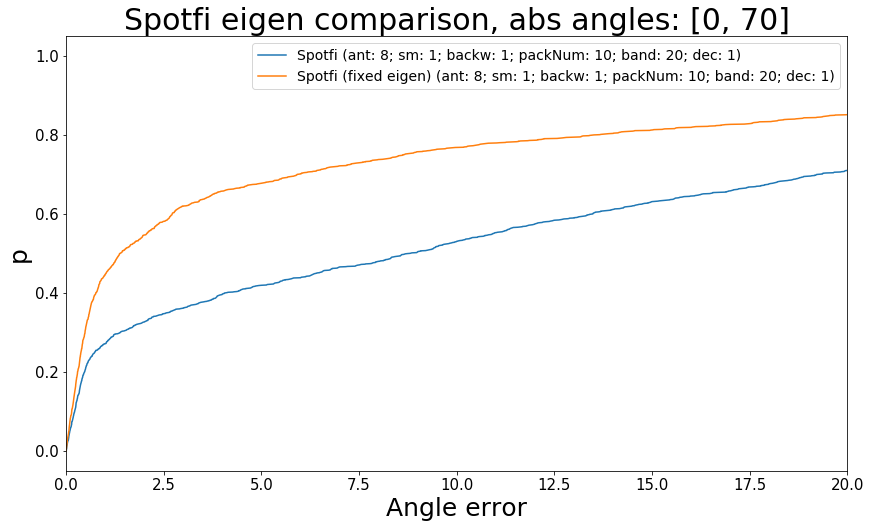

In [29]:
p1 = param(alg="spotfi", ant=8, sm=1, backw=1, packNum=10, band=20, dec=1, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=8, sm=1, backw=1, packNum=10, band=20, dec=1, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi eigen comparison, abs angles: [0, 70]", 20)

1) Fixed amount of eigen values works better.

# Which configuration of Spotfi is better?

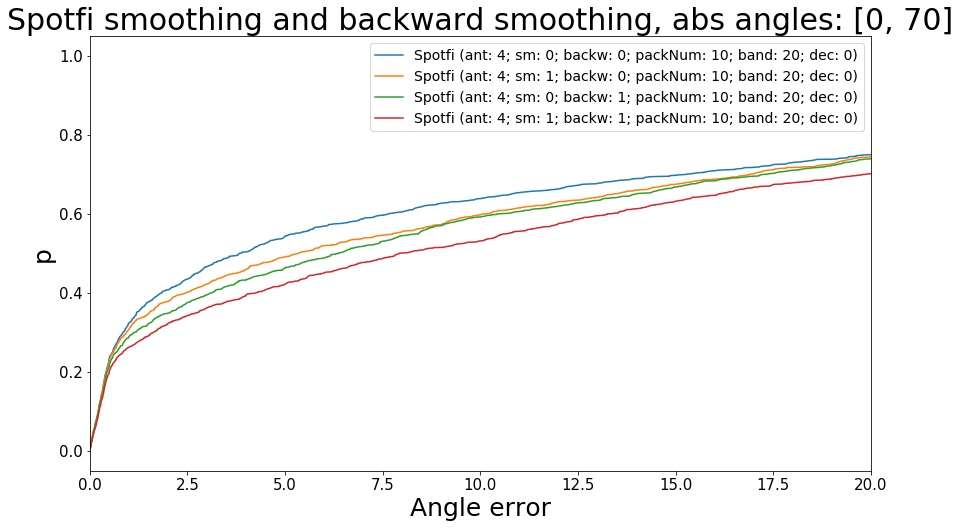

In [30]:
p1 = param(alg="spotfi", ant=4, sm=0, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi", ant=4, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p3 = param(alg="spotfi", ant=4, sm=0, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p4 = param(alg="spotfi", ant=4, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Spotfi smoothing and backward smoothing, abs angles: [0, 70]", 20)

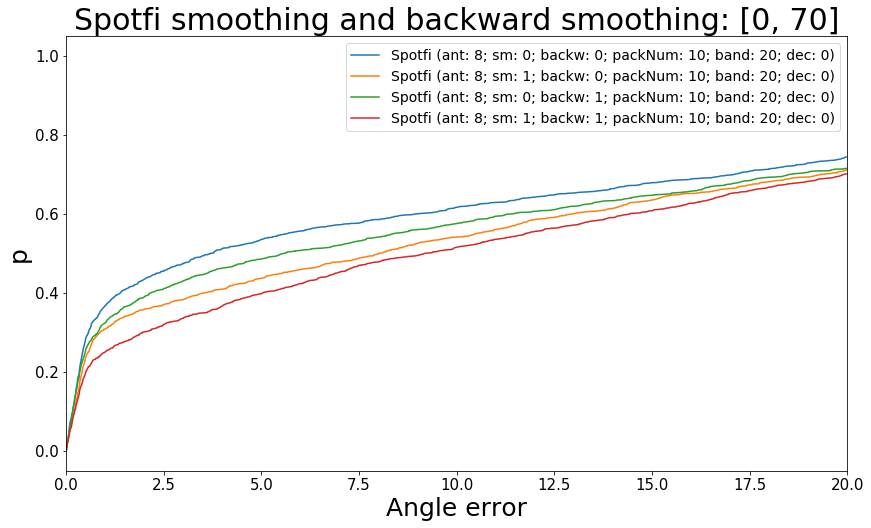

In [31]:
p1 = param(alg="spotfi", ant=8, sm=0, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi", ant=8, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p3 = param(alg="spotfi", ant=8, sm=0, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p4 = param(alg="spotfi", ant=8, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Spotfi smoothing and backward smoothing: [0, 70]", 20)

1) Smoothing DECREASES accuracy when eigen values amount is not FIXED.

2) Backward smoothing DECREASES accuracy when eigen values amount is not FIXED.

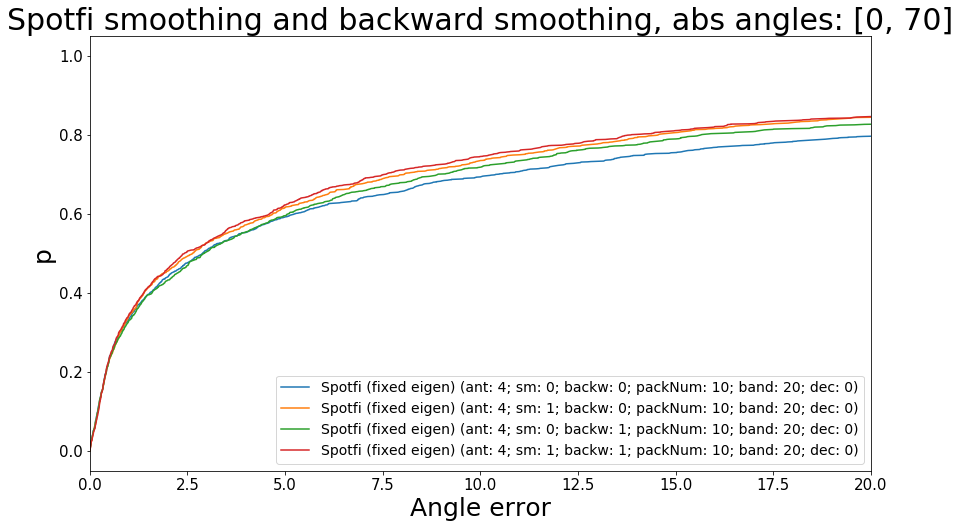

In [32]:
p1 = param(alg="spotfi_fixed", ant=4, sm=0, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=4, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p3 = param(alg="spotfi_fixed", ant=4, sm=0, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p4 = param(alg="spotfi_fixed", ant=4, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Spotfi smoothing and backward smoothing, abs angles: [0, 70]", 20)

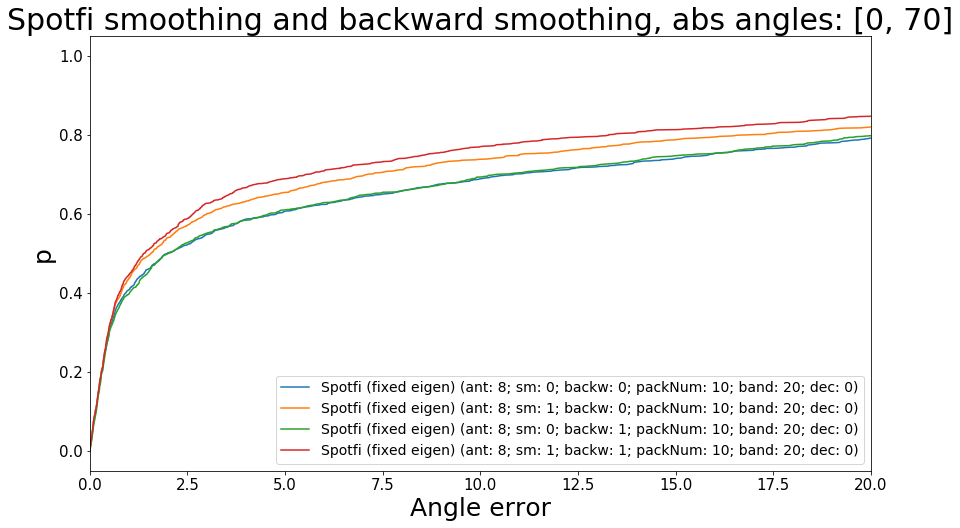

In [33]:
p1 = param(alg="spotfi_fixed", ant=8, sm=0, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=8, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p3 = param(alg="spotfi_fixed", ant=8, sm=0, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p4 = param(alg="spotfi_fixed", ant=8, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Spotfi smoothing and backward smoothing, abs angles: [0, 70]", 20)

1) Smoothing INCREASES accuracy when eigen values amount is FIXED.

2) Backward smoothing INCREASES accuracy when eigen values amount is FIXED.

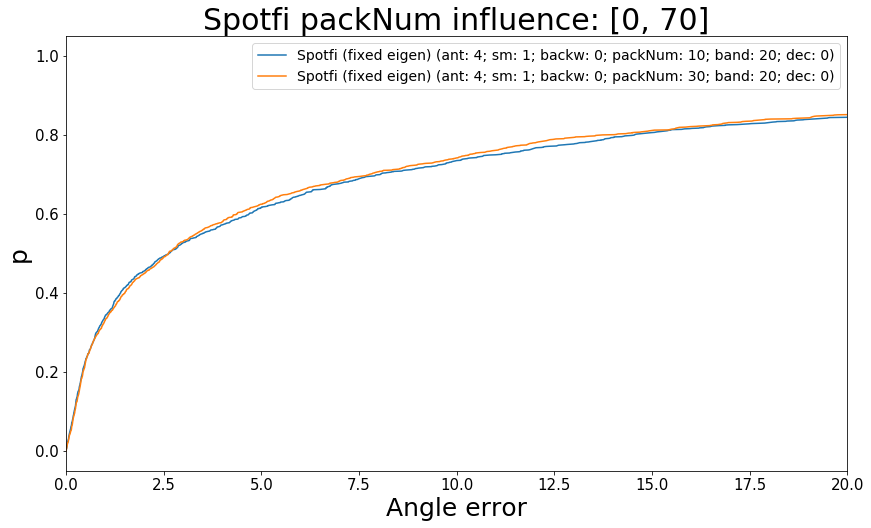

In [34]:
p1 = param(alg="spotfi_fixed", ant=4, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=4, sm=1, backw=0, packNum=30, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi packNum influence: [0, 70]", 20)

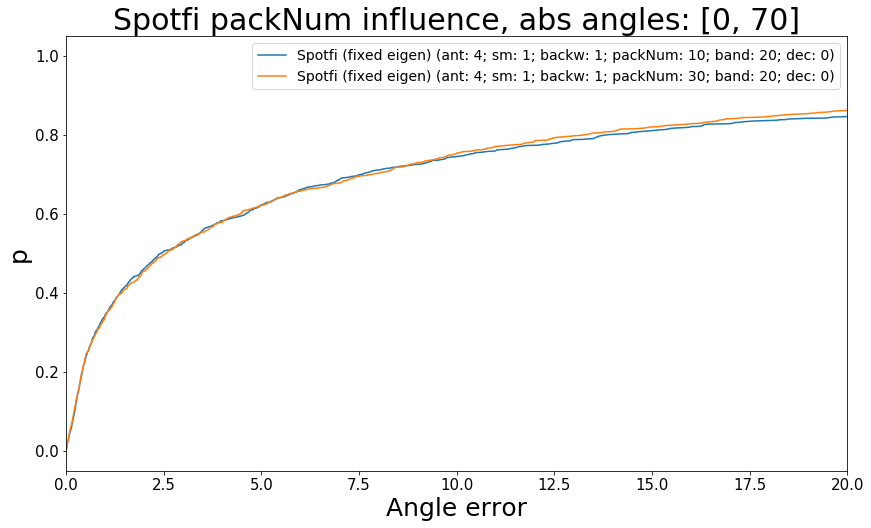

In [35]:
p1 = param(alg="spotfi_fixed", ant=4, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=4, sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi packNum influence, abs angles: [0, 70]", 20)

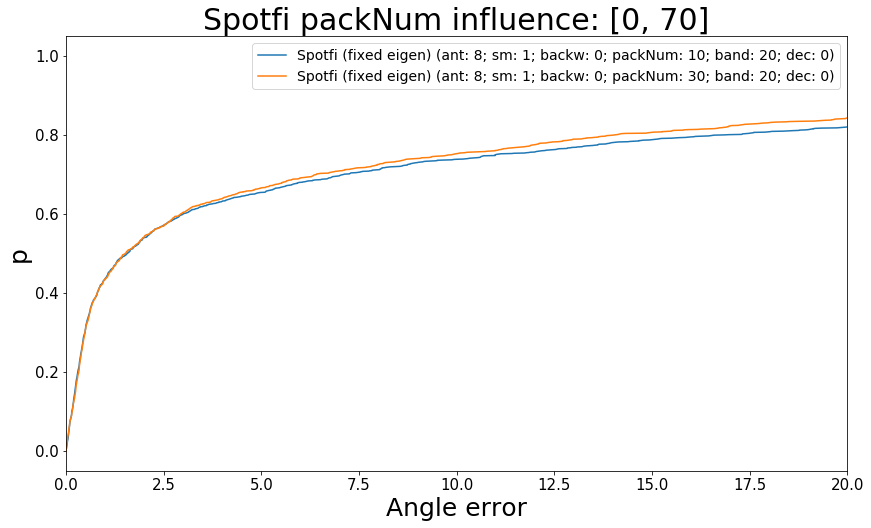

In [36]:
p1 = param(alg="spotfi_fixed", ant=8, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=8, sm=1, backw=0, packNum=30, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi packNum influence: [0, 70]", 20)

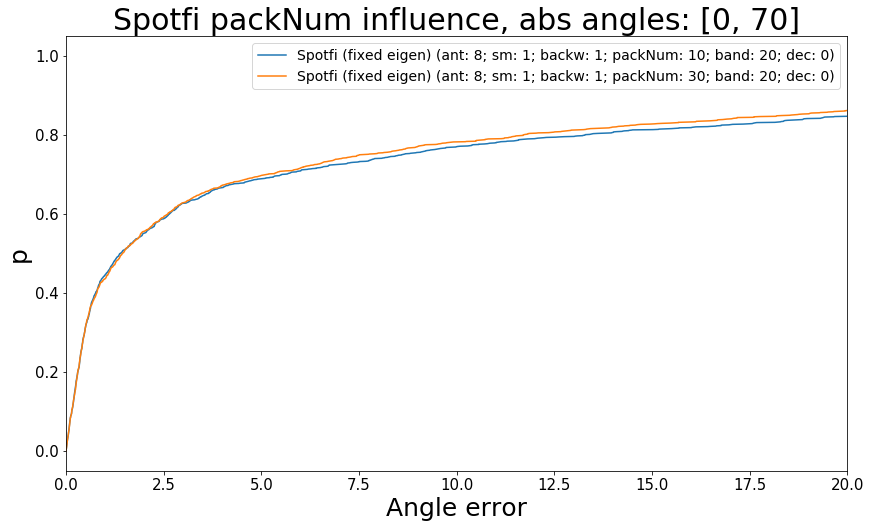

In [37]:
p1 = param(alg="spotfi_fixed", ant=8, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=8, sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi packNum influence, abs angles: [0, 70]", 20)

1) Number of packets almost doesn't affect estimation accuracy in case of 4 antennas.

2) Increase of packet number slightly increases estimation accuracy in case of 8 antennas.

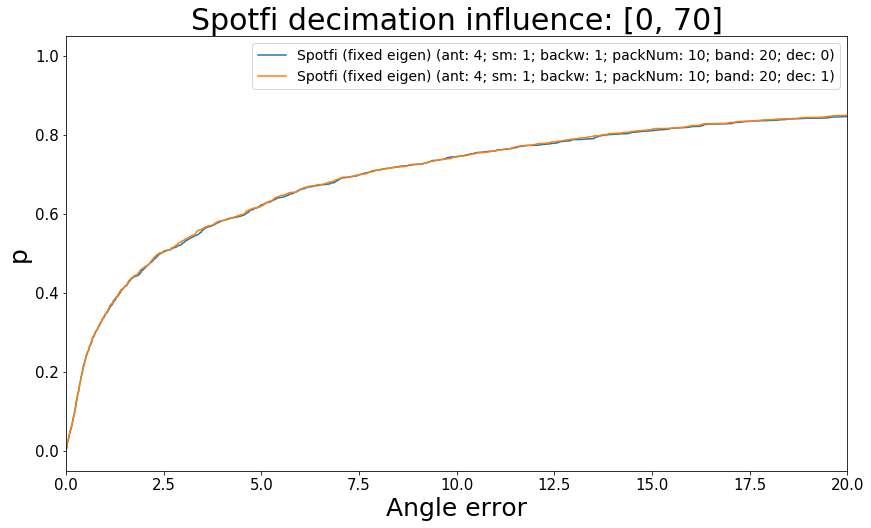

In [38]:
p1 = param(alg="spotfi_fixed", ant=4, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=4, sm=1, backw=1, packNum=10, band=20, dec=1, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi decimation influence: [0, 70]", 20)

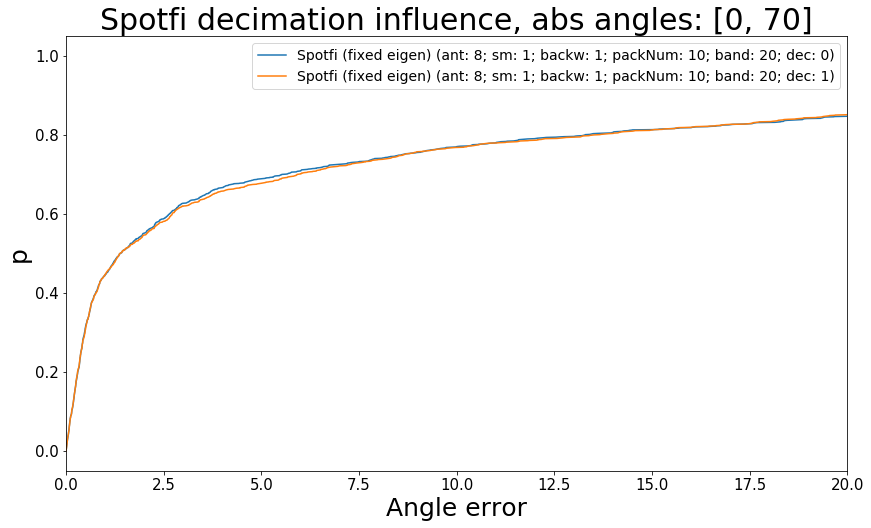

In [39]:
p1 = param(alg="spotfi_fixed", ant=8, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=8, sm=1, backw=1, packNum=10, band=20, dec=1, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi decimation influence, abs angles: [0, 70]", 20)

1) Decimation almost doesn't affect estimation accuracy in case of 4 antennas.

2) Decimation slightly decreases estimation accuracy in case of 8 antennas.

# Which configuration of OpArray is better?

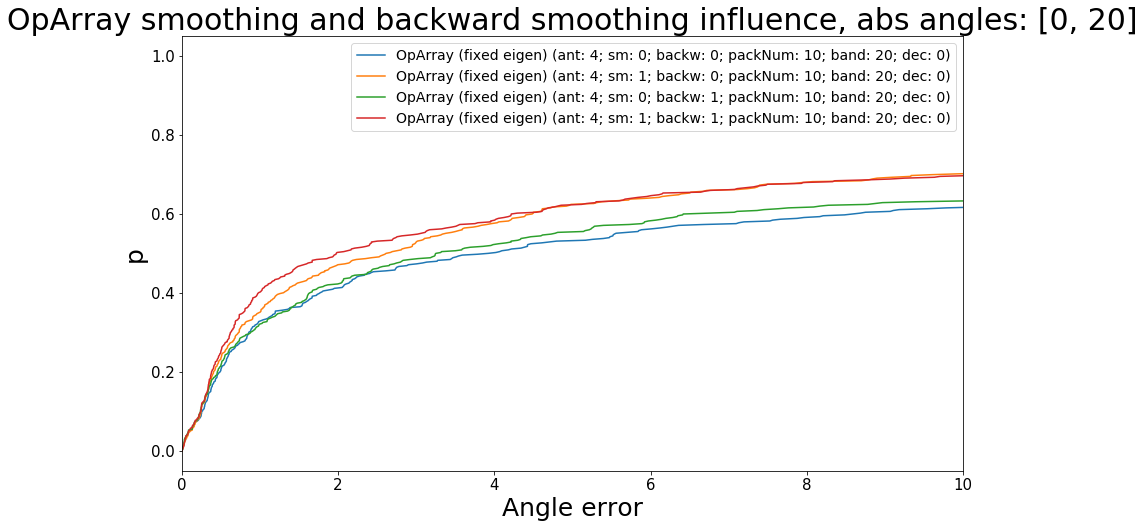

In [40]:
p1 = param(alg="oparray_fixed", ant=4, sm=0, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="oparray_fixed", ant=4, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p3 = param(alg="oparray_fixed", ant=4, sm=0, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p4 = param(alg="oparray_fixed", ant=4, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 20], "OpArray smoothing and backward smoothing influence, abs angles: [0, 20]", 10)

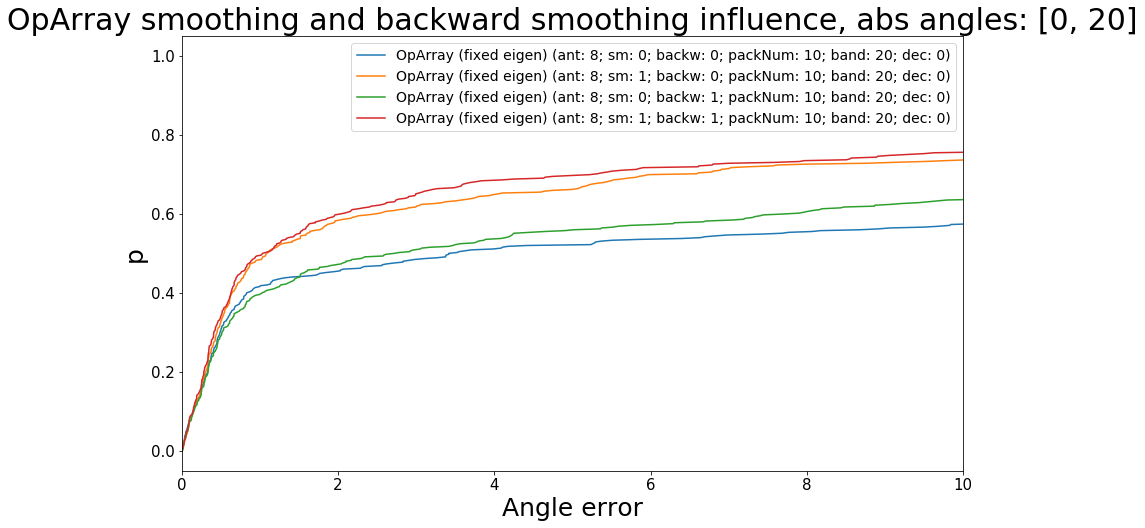

In [41]:
p1 = param(alg="oparray_fixed", ant=8, sm=0, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="oparray_fixed", ant=8, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p3 = param(alg="oparray_fixed", ant=8, sm=0, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p4 = param(alg="oparray_fixed", ant=8, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 20], "OpArray smoothing and backward smoothing influence, abs angles: [0, 20]", 10)

1) Smoothing INCREASES accuracy when eigen values amount is FIXED.

2) Backward smoothing significantly INCREASES accuracy when eigen values amount is FIXED.

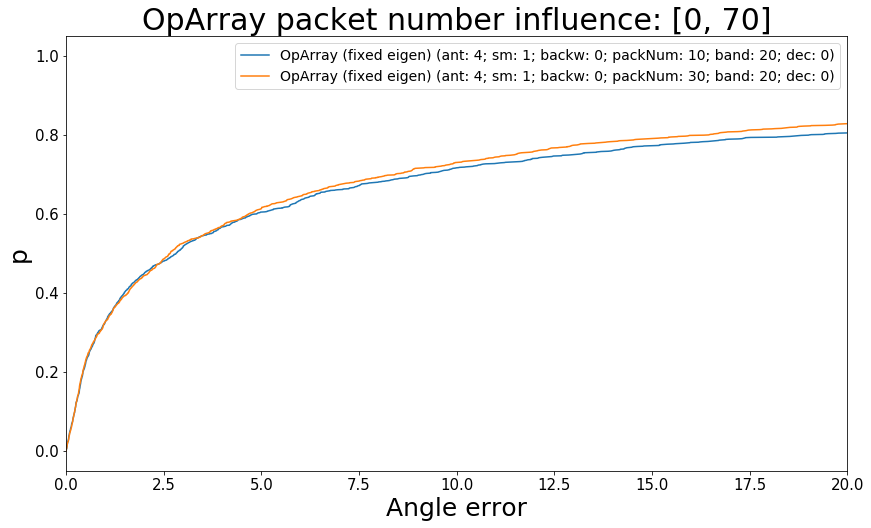

In [42]:
p1 = param(alg="oparray_fixed", ant=4, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="oparray_fixed", ant=4, sm=1, backw=0, packNum=30, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "OpArray packet number influence: [0, 70]", 20)

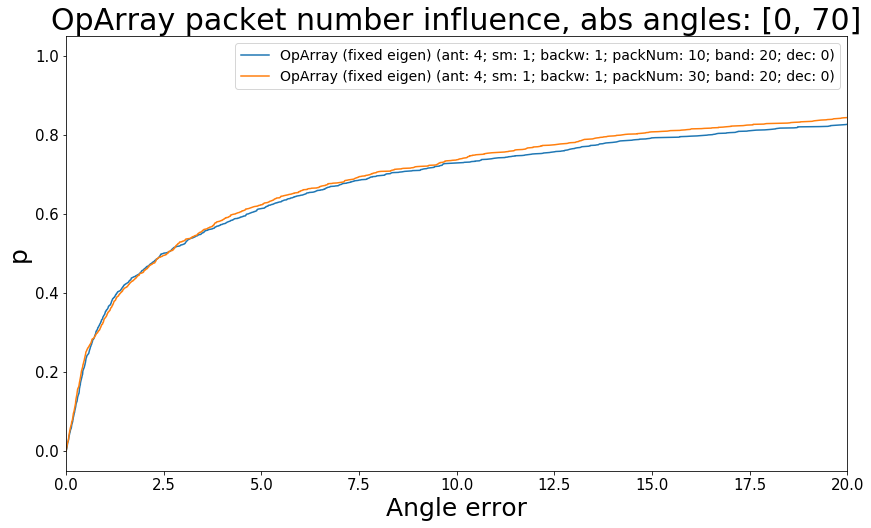

In [43]:
p1 = param(alg="oparray_fixed", ant=4, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="oparray_fixed", ant=4, sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "OpArray packet number influence, abs angles: [0, 70]", 20)

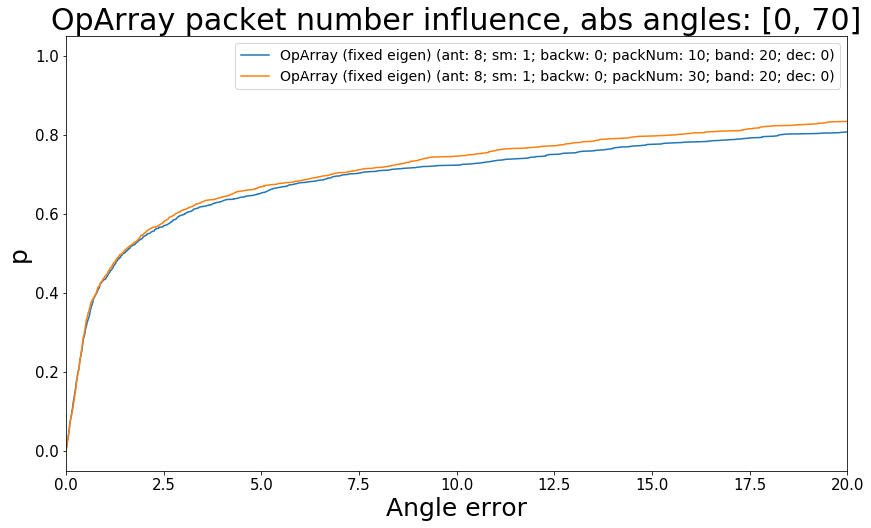

In [44]:
p1 = param(alg="oparray_fixed", ant=8, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="oparray_fixed", ant=8, sm=1, backw=0, packNum=30, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "OpArray packet number influence, abs angles: [0, 70]", 20)

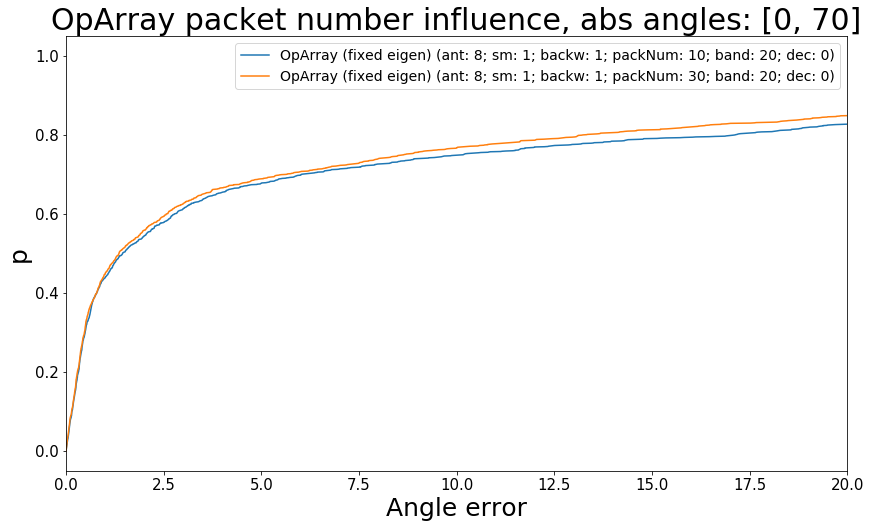

In [45]:
p1 = param(alg="oparray_fixed", ant=8, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="oparray_fixed", ant=8, sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "OpArray packet number influence, abs angles: [0, 70]", 20)

1) Increase of packet number increases estimation accuracy of Orion in all cases.

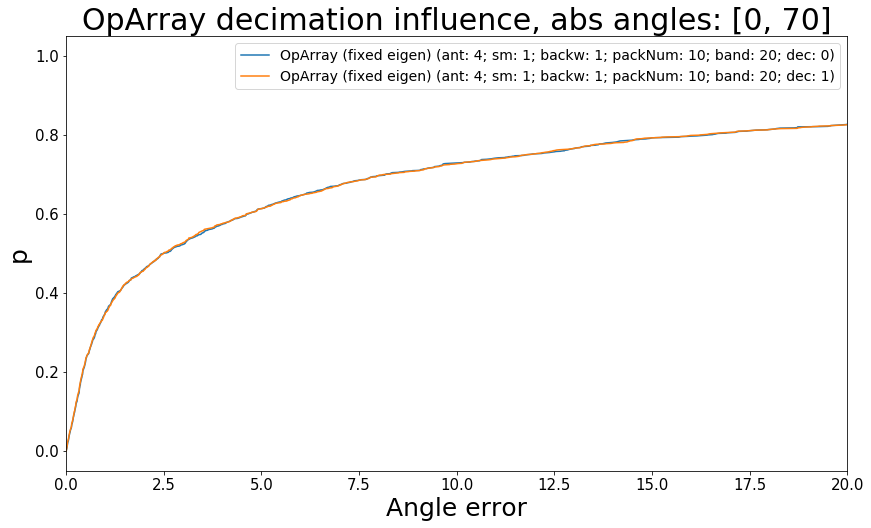

In [46]:
p1 = param(alg="oparray_fixed", ant=4, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="oparray_fixed", ant=4, sm=1, backw=1, packNum=10, band=20, dec=1, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "OpArray decimation influence, abs angles: [0, 70]", 20)

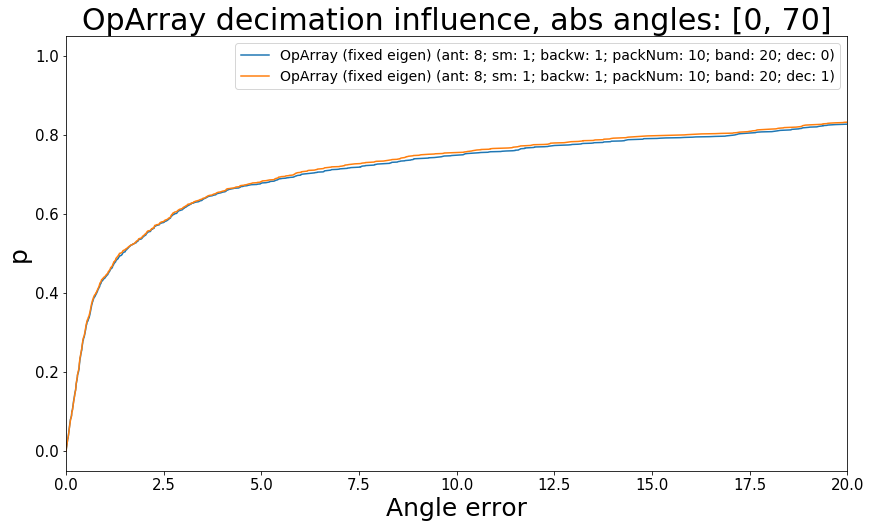

In [47]:
p1 = param(alg="oparray_fixed", ant=8, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="oparray_fixed", ant=8, sm=1, backw=1, packNum=10, band=20, dec=1, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "OpArray decimation influence, abs angles: [0, 70]", 20)

1) Decimation almost doesn't affect estimation accuracy in case of 4 antennas.

2) Decimation even slightly increases estimation accuracy in case of 8 antennas.

# Spotfi or OpArray?

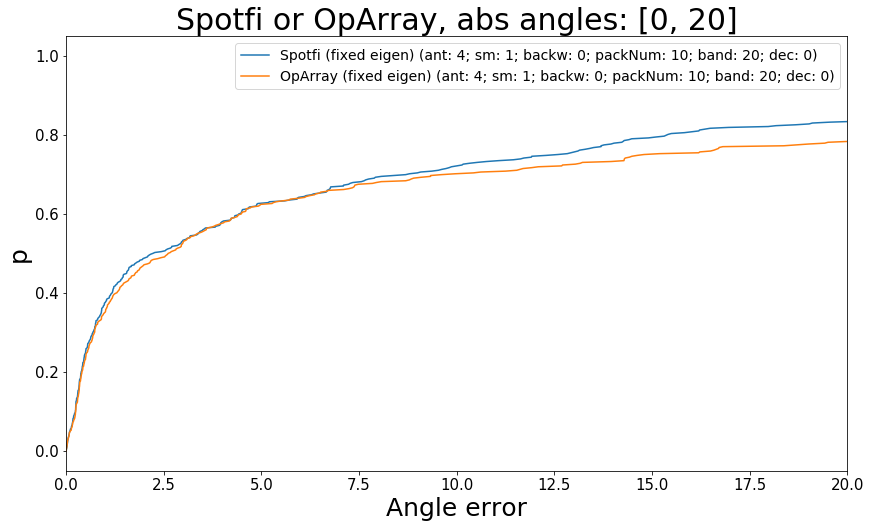

In [48]:
p1 = param(alg="spotfi_fixed", ant=4, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="oparray_fixed", ant=4, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 20], "Spotfi or OpArray, abs angles: [0, 20]", 20)

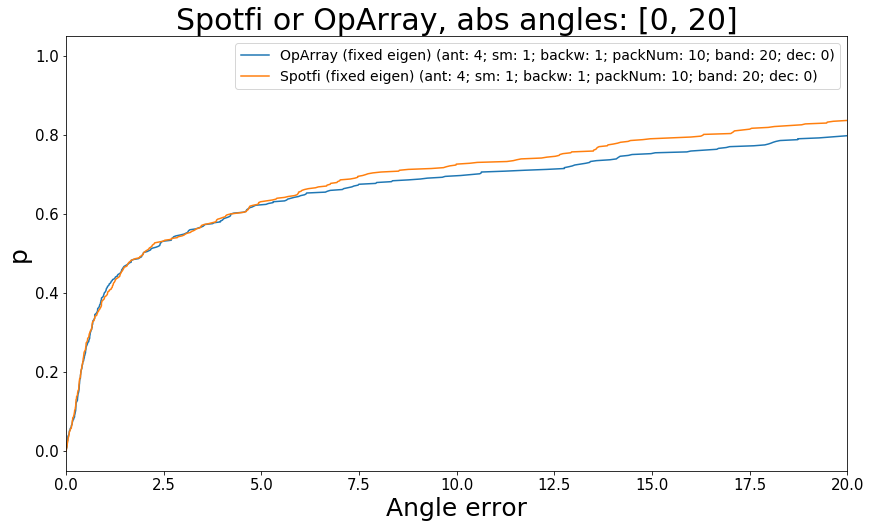

In [49]:
p1 = param(alg="oparray_fixed", ant=4, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=4, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 20], "Spotfi or OpArray, abs angles: [0, 20]", 20)

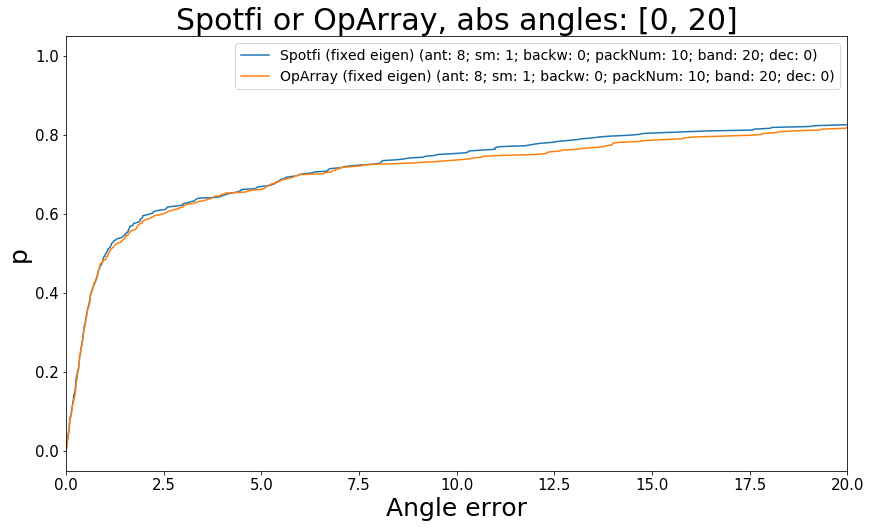

In [50]:
p1 = param(alg="spotfi_fixed", ant=8, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="oparray_fixed", ant=8, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 20], "Spotfi or OpArray, abs angles: [0, 20]", 20)

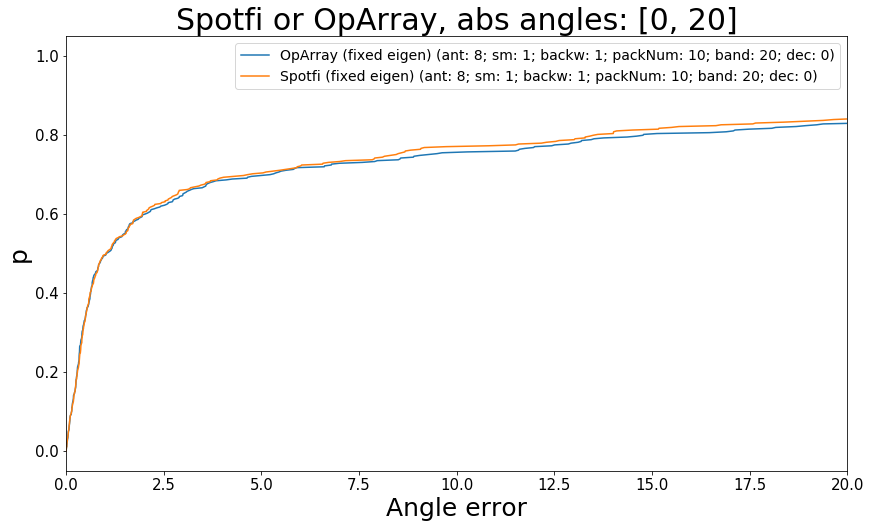

In [51]:
p1 = param(alg="oparray_fixed", ant=8, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=8, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 20], "Spotfi or OpArray, abs angles: [0, 20]", 20)

1) In general Spotfi works better than OpArray.

# Best algorithms comparison in different angle range

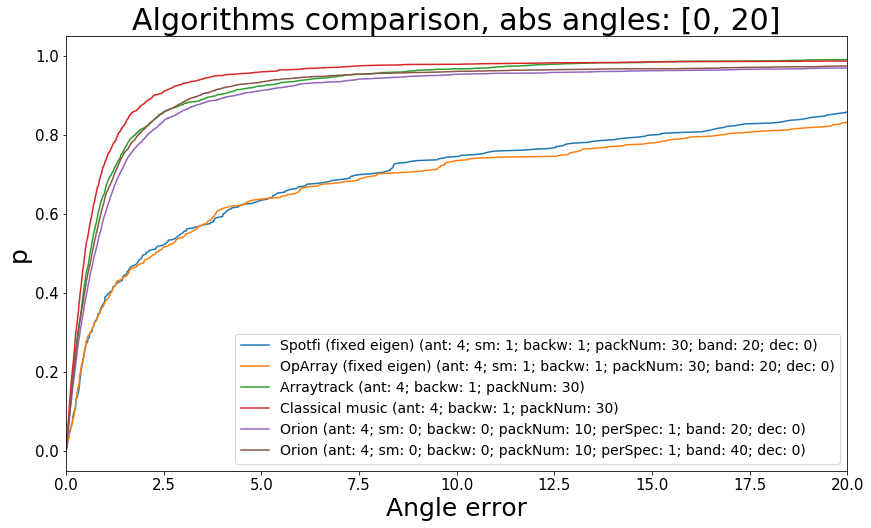

In [77]:
p1 = param(alg="spotfi_fixed", ant=4, sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=2000)
p2 = param(alg="oparray_fixed", ant=4, sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=2000)
p3 = param(alg="arraytrack", ant=4, backw=1, packNum=30, seed_lim=10000)
p4 = param(alg="music", ant=4, backw=1, packNum=30, seed_lim=10000)
p5 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=0, seed_lim=10000)
p6 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=0, seed_lim=10000)

p = [p1,p2,p3,p4,p5,p6]

plotResults(p, [0, 20], "Algorithms comparison, abs angles: [0, 20]", 20)

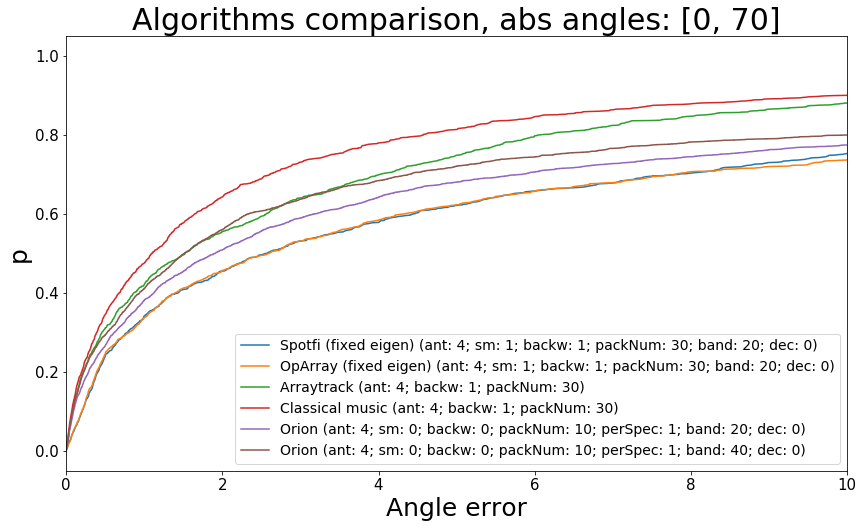

In [80]:
p1 = param(alg="spotfi_fixed", ant=4, sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=2000)
p2 = param(alg="oparray_fixed", ant=4, sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=2000)
p3 = param(alg="arraytrack", ant=4, backw=1, packNum=30, seed_lim=2000)
p4 = param(alg="music", ant=4, backw=1, packNum=30, seed_lim=2000)
p5 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=0, seed_lim=2000)
p6 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=0, seed_lim=2000)

p = [p1,p2,p3,p4,p5,p6]

plotResults(p, [0, 70], "Algorithms comparison, abs angles: [0, 70]", 10)

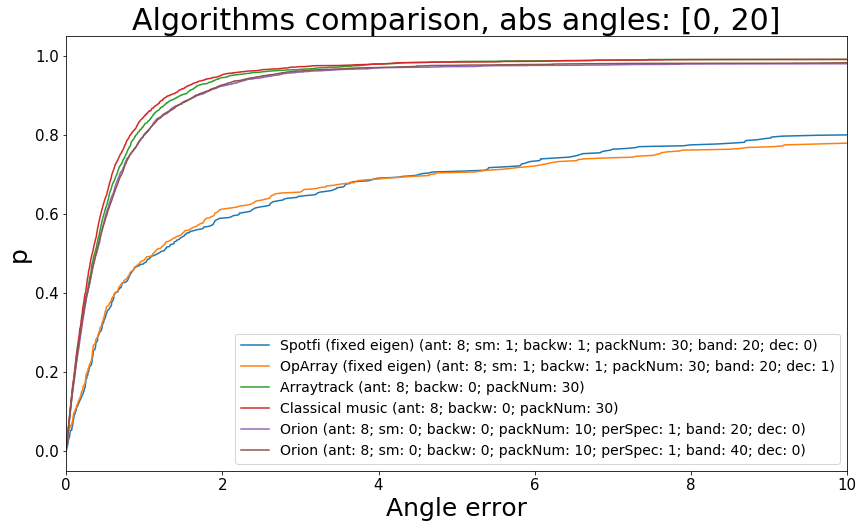

In [79]:
p1 = param(alg="spotfi_fixed", ant=8, sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=2000)
p2 = param(alg="oparray_fixed", ant=8, sm=1, backw=1, packNum=30, band=20, dec=1, seed_lim=2000)
p3 = param(alg="arraytrack", ant=8, backw=0, packNum=30, seed_lim=10000)
p4 = param(alg="music", ant=8, backw=0, packNum=30, seed_lim=10000)
p5 = param(alg="orion", ant=8, sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=0, seed_lim=10000)
p6 = param(alg="orion", ant=8, sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=0, seed_lim=10000)

p = [p1,p2,p3,p4,p5,p6]

plotResults(p, [0, 20], "Algorithms comparison, abs angles: [0, 20]", 10)

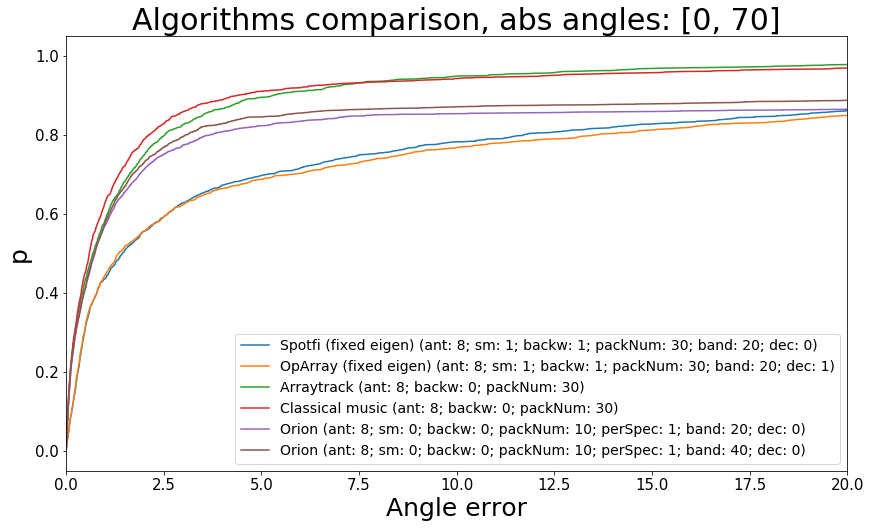

In [55]:
p1 = param(alg="spotfi_fixed", ant=8, sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=2000)
p2 = param(alg="oparray_fixed", ant=8, sm=1, backw=1, packNum=30, band=20, dec=1, seed_lim=2000)
p3 = param(alg="arraytrack", ant=8, backw=0, packNum=30, seed_lim=2000)
p4 = param(alg="music", ant=8, backw=0, packNum=30, seed_lim=2000)
p5 = param(alg="orion", ant=8, sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=0, seed_lim=2000)
p6 = param(alg="orion", ant=8, sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=0, seed_lim=2000)

p = [p1,p2,p3,p4,p5,p6]

plotResults(p, [0, 70], "Algorithms comparison, abs angles: [0, 70]", 20)

# Are there mistakes in LOS determination?

In [56]:
pd.set_option('display.max_rows', 101)
next_next_better = spotfi[(spotfi.errorAngle > spotfi.errorNextNextAngle)]
next_next_better = next_next_better[['realAngle', 'meanA1', 'meanA2', 'meanA3', 'clSize1', 'clSize2', \
                                     'clSize3', 'stdA1', 'stdA2', 'stdA3', 'spectrumsNum', 'SNR', 'Kfactor']]
next_next_better

,realAngle,meanA1,meanA2,meanA3,clSize1,clSize2,clSize3,stdA1,stdA2,stdA3,spectrumsNum,SNR,Kfactor
259,66.7318,12.043,-52.400,34.333,46,15,15,39.996,2.444,1.047,15.0,4.43990,19.6148
263,66.7318,33.667,-52.200,35.000,6,5,5,17.247,3.271,0.707,5.0,4.43990,19.6148
278,66.7318,31.368,-40.875,35.600,19,8,5,14.667,15.254,30.754,5.0,4.43990,19.6148
280,66.7318,-42.419,39.704,20.044,105,98,90,6.903,13.963,30.136,30.0,4.43990,19.6148
283,66.7318,34.186,-50.889,37.455,43,18,11,12.646,3.341,24.837,15.0,4.43990,19.6148
285,66.7318,-44.000,25.923,31.565,42,39,23,6.677,25.669,26.831,10.0,4.43990,19.6148
286,66.7318,36.900,-46.462,41.250,20,13,8,14.850,5.695,21.881,5.0,4.43990,19.6148
288,66.7318,-48.918,27.034,11.450,61,58,40,16.366,14.046,20.943,30.0,4.43990,19.6148
289,66.7318,-48.469,26.836,11.750,64,61,36,17.027,13.781,18.061,30.0,4.43990,19.6148
295,66.7318,33.200,-51.250,37.333,5,4,3,3.493,3.500,12.423,5.0,4.43990,19.6148


In [57]:
next_next_better.iloc[2:5]

,realAngle,meanA1,meanA2,meanA3,clSize1,clSize2,clSize3,stdA1,stdA2,stdA3,spectrumsNum,SNR,Kfactor
278,66.7318,31.368,-40.875,35.600,19,8,5,14.667,15.254,30.754,5.0,4.4399,19.6148
280,66.7318,-42.419,39.704,20.044,105,98,90,6.903,13.963,30.136,30.0,4.4399,19.6148
283,66.7318,34.186,-50.889,37.455,43,18,11,12.646,3.341,24.837,15.0,4.4399,19.6148


In [58]:
spotfi.iloc[259:311]

,seed,SNR,Kfactor,realAngle,ant,packetNum,perSpec,smoothing,backw,bandwidth,...,stdA4,stdD4,meanA4,meanD4,clSize5,stdA5,stdD5,meanA5,meanD5,spectrumsNum
259,5,4.4399,19.6148,66.7318,8,30,2,False,False,20,...,19.511,56.092,40.000,104.615,0,NaN,NaN,NaN,NaN,15.0
260,5,4.4399,19.6148,66.7318,8,10,1,False,False,20,...,29.115,46.147,-13.640,-247.400,0,NaN,NaN,NaN,NaN,10.0
261,5,4.4399,19.6148,66.7318,8,10,1,False,False,20,...,1.727,32.162,-37.875,203.875,0,NaN,NaN,NaN,NaN,10.0
262,5,4.4399,19.6148,66.7318,8,10,2,False,False,20,...,3.000,47.014,-37.000,201.333,0,NaN,NaN,NaN,NaN,5.0
263,5,4.4399,19.6148,66.7318,8,10,2,False,False,20,...,3.162,45.464,-36.000,213.500,0,NaN,NaN,NaN,NaN,5.0
264,5,4.4399,19.6148,66.7318,8,30,1,False,True,20,...,21.549,76.496,-0.722,-197.556,0,NaN,NaN,NaN,NaN,30.0
265,5,4.4399,19.6148,66.7318,8,30,1,False,True,20,...,20.960,72.169,23.154,-179.231,0,NaN,NaN,NaN,NaN,30.0
266,5,4.4399,19.6148,66.7318,8,30,2,False,True,20,...,13.133,117.267,16.143,48.286,0,NaN,NaN,NaN,NaN,15.0
267,5,4.4399,19.6148,66.7318,8,30,2,False,True,20,...,23.655,16.277,36.083,271.750,0,NaN,NaN,NaN,NaN,15.0
268,5,4.4399,19.6148,66.7318,8,10,1,False,True,20,...,7.368,22.167,-49.909,57.818,0,NaN,NaN,NaN,NaN,10.0


In [59]:
spotfi[(spotfi.errorAngle > spotfi.errorNextAngle)]

,seed,SNR,Kfactor,realAngle,ant,packetNum,perSpec,smoothing,backw,bandwidth,...,stdA4,stdD4,meanA4,meanD4,clSize5,stdA5,stdD5,meanA5,meanD5,spectrumsNum
100,2,8.71990,56.16740,-85.33330,4,10,1,False,False,20,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,10.0
101,2,8.71990,56.16740,-85.33330,4,10,1,False,False,20,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,10.0
108,2,8.71990,56.16740,-85.33330,4,10,1,False,True,20,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,10.0
109,2,8.71990,56.16740,-85.33330,4,10,1,False,True,20,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,10.0
258,5,4.43990,19.61480,66.73180,8,30,2,False,False,20,...,5.595,137.278,-27.600,-124.400,0,NaN,NaN,NaN,NaN,15.0
275,5,4.43990,19.61480,66.73180,8,30,2,True,False,20,...,0.707,1.414,72.500,195.000,0,NaN,NaN,NaN,NaN,15.0
280,5,4.43990,19.61480,66.73180,8,30,1,True,True,20,...,28.235,12.548,35.915,276.310,0,NaN,NaN,NaN,NaN,30.0
285,5,4.43990,19.61480,66.73180,8,10,1,True,True,20,...,1.014,11.962,51.800,92.333,0,NaN,NaN,NaN,NaN,10.0
288,5,4.43990,19.61480,66.73180,4,30,1,False,False,20,...,31.311,70.200,10.238,-196.381,0,NaN,NaN,NaN,NaN,30.0
289,5,4.43990,19.61480,66.73180,4,30,1,False,False,20,...,5.292,170.648,81.000,90.000,0,NaN,NaN,NaN,NaN,30.0


# Let's group data

In [60]:
ori_gr=ori.drop(columns=['SNR', 'Kfactor', 'seed', 'realAngle', 'estAngle', 'stdAngle', 'nextAngle', 'stdNextAngle'])

In [62]:
pd.DataFrame(ori_gr.groupby(by=['ant', 'bandwidth', 'packNum', 'perSpec', 'decimation']).mean())

KeyError: 'packNum'

In [ ]:
arr_gr=arr.drop(columns=['SNR', 'Kfactor', 'seed', 'realAngle', 'estAngle', 'stdAngle', 'nextAngle', 'stdNextAngle'])

In [ ]:
arr[arr.nextAngle != 999]

In [ ]:
pd.DataFrame(arr[(arr.errorAngle < 10) | (arr.nextAngle == 999)].groupby(by=['ant', 'backwSmth', 'packetNum']).mean())

In [ ]:
pd.DataFrame(arr_gr.groupby(by=['ant', 'backwSmth', 'packetNum']).mean())

In [ ]:
pd.DataFrame(ori[(ori.errorAngle < 10) | (ori.nextAngle == 999)].groupby(by=['ant', 'bandwidth', 'packetPerSpec', 'decimation', 'packetNum']).mean()).drop(columns=['seed', 'SNR', 'Kfactor', 'realAngle', 'estAngle', 'nextAngle', 'stdNextAngle'])